In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from pandas import datetime as dt
import yfinance as yf
from yahoofinancials import YahooFinancials
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

C:\Users\User\AppData\Local\Temp/ipykernel_18984/2374346551.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


In [2]:
#def parser(x):
#    return datetime.strptime(x,'%d/%m/%Y')

#Aframax_price = pd.read_csv(r'C:/Users/Data/Aframax_Purchase.csv',  parse_dates = [0], index_col = 0, date_parser = parser, delimiter = ',')

In [3]:
ticker = "AMZN"
data = yf.download(ticker,start="2019-01-01",end="2022-04-30",progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
...,...,...,...,...,...,...
2022-04-25,2880.459961,2924.429932,2846.129883,2921.479980,2921.479980,3093700
2022-04-26,2896.000000,2897.120117,2778.590088,2787.820068,2787.820068,3876500
2022-04-27,2803.830078,2838.969971,2715.669922,2763.340088,2763.340088,3566800


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200


In [5]:
data.rename(columns={"Close":'close'},inplace=True)
data = data['close']

<AxesSubplot:xlabel='Date'>

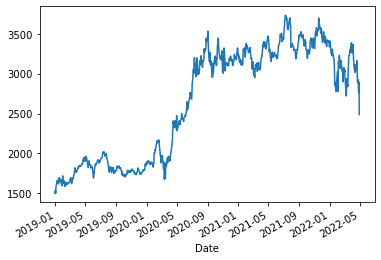

In [6]:
data.plot()

In [7]:
ts.adfuller(data) # the p-value is bigger than 0.05 .The series is stationary

(-1.726258834866883,
 0.41763643334077094,
 0,
 839,
 {'1%': -3.438168140637663,
  '5%': -2.864991017121922,
  '10%': -2.5686076019468094},
 8915.190522013747)

# Stationary means mean, variance and covariance is constant over periods

<AxesSubplot:xlabel='Date'>

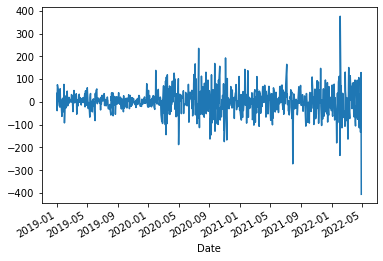

In [9]:
data_diff = data.diff(periods=1)
data_diff.plot()

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


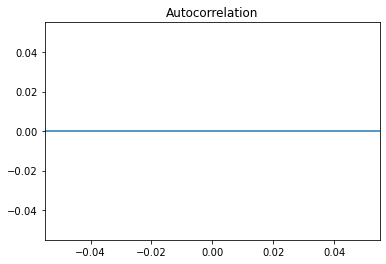

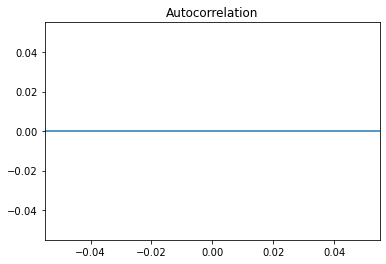

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_diff)

In [11]:
data_diff.head()

Date
2018-12-31          NaN
2019-01-02    37.160034
2019-01-03   -38.849976
2019-01-04    75.109985
2019-01-07    54.119995
Name: close, dtype: float64

In [12]:
data_diff = data_diff[1:]
data_diff.head()

Date
2019-01-02    37.160034
2019-01-03   -38.849976
2019-01-04    75.109985
2019-01-07    54.119995
2019-01-08    27.069946
Name: close, dtype: float64

In [13]:
data_diff.describe()

count    839.000000
mean       1.172419
std       55.898618
min     -406.300049
25%      -23.415100
50%        2.439941
75%       26.674927
max      375.880127
Name: close, dtype: float64

In [14]:
def calc_adf(x, y):
    result = sm.OLS(x, y).fit()
    return ts.adfuller(result.resid)

In [15]:

print("Self ADF", calc_adf(data_diff, data_diff))

Self ADF (nan, nan, 0, 838, {'1%': -3.4381774989729816, '5%': -2.8649951426291, '10%': -2.568609799556849}, -inf)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [33]:
x = data.values
train = x[0:725]
test = x[725:]
predictions =[]

In [34]:
test.size

115

In [35]:
import itertools
p=d=q=range(0,6)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [36]:
import warnings
warnings.filterwarnings('ignore')
for  i in pdq:
    try:
        model_arima = ARIMA(train,order=(i))
        model_arima_fit = model_arima.fit()
        print(i,model_arima_fit.aic)
        
    except:
        continue

(0, 0, 0) 11581.878569766672
(0, 0, 1) 10652.875425720227
(0, 0, 2) 9926.16427738321
(0, 0, 3) 9430.573241049762
(0, 0, 4) 9084.228093423953
(0, 0, 5) 8826.292956159105
(0, 1, 0) 7690.186254186129
(0, 1, 1) 7691.735721367217
(0, 1, 2) 7693.726077641275
(0, 1, 3) 7688.804536885382
(0, 1, 4) 7690.111304749347
(0, 1, 5) 7690.956473166336
(0, 2, 0) 8198.742981285748
(0, 2, 1) 7689.136661061251
(0, 2, 2) 7690.735041729162
(0, 2, 3) 7692.732035310915
(0, 2, 4) 7688.029582170095
(0, 2, 5) 7689.2735566976135
(1, 0, 0) 7710.512343530897
(1, 0, 1) 7712.202770917288
(1, 0, 2) 7714.20115764082
(1, 0, 3) 7709.993044854086
(1, 0, 4) 7711.090669660634
(1, 0, 5) 7712.16425269706
(1, 1, 0) 7691.73717911932
(1, 1, 1) 7692.415829728376
(1, 1, 2) 7693.996581084997
(1, 1, 3) 7689.733750202458
(1, 1, 4) 7691.723202247522
(1, 1, 5) 7692.932187962837
(1, 2, 0) 7980.983621939673
(1, 2, 1) 7690.735099640189
(1, 2, 2) 7691.410205222908
(1, 2, 3) 7692.937305904139
(1, 2, 4) 7688.909569808329
(1, 2, 5) 7691.027826

In [37]:
model_arima = ARIMA(train,order=(2,2,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

7679.746583615028


In [41]:
predictions = model_arima_fit.predict(start=725,end=839)

In [42]:
test

array([3545.67993164, 3540.69995117, 3549.        , 3696.06005859,
       3676.57006836, 3572.57006836, 3580.04003906, 3580.40991211,
       3504.56005859, 3561.57006836, 3507.07006836, 3443.7199707 ,
       3437.36010742, 3389.79003906, 3427.37011719, 3523.29003906,
       3523.15991211, 3483.41992188, 3444.23999023, 3391.35009766,
       3381.83007812, 3466.30004883, 3377.41992188, 3400.35009766,
       3341.58007812, 3408.34008789, 3420.73999023, 3421.37011719,
       3393.38989258, 3413.2199707 , 3384.02001953, 3372.88989258,
       3334.34008789, 3408.09008789, 3350.43994141, 3287.13989258,
       3265.08007812, 3251.08007812, 3229.7199707 , 3307.23999023,
       3304.13989258, 3224.2800293 , 3242.76000977, 3178.35009766,
       3125.97998047, 3033.35009766, 2852.86010742, 2890.87988281,
       2799.7199707 , 2777.44995117, 2792.75      , 2879.56005859,
       2991.4699707 , 3023.87011719, 3012.25      , 2776.90991211,
       3152.79003906, 3158.70996094, 3228.27001953, 3223.79003

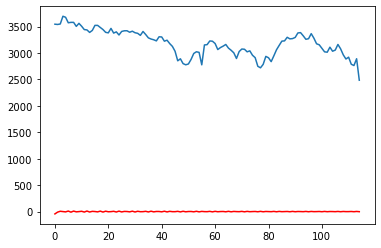

In [43]:
plt.plot(test)
plt.plot(predictions,color = 'red') # Model Arima fails to predict the AMZN stock